# An Introduction to Bayesian Regression Models

Before we jump in to model-building and using MCMC to do wonderful things, it is useful to understand a few of the theoretical underpinnings of the Bayesian statistical paradigm. A little theory (and I do mean a *little*) goes a long way towards being able to apply the methods correctly and effectively.

## Regression Analysis

Regression modeling meets many analytic needs:
genreg-intro

- Prediction, capitalizing on efficient estimation methods such
as maximum likelihood and the predominant additivity in a
variety of problems
    - E.g.: effects of age, smoking, and air quality add to predict lung capacity
    - When effects are predominantly additive, or when there
aren’t too many interactions and one knows the likely
interacting variables in advance, regression can beat machine learning techniques that assume interaction effects
are likely to be as strong as main effects

- Separate effects of variables (especially exposure and treatment)

### Model Formulations

General regression model:

$$C(Y|X) = g(X)$$

General linear regression model:

$$C(Y|X) = g(X\beta)$$

Example: ordinary linear regression

$$E(Y|X) = X\beta$$

$$Y|X \sim N(X\beta, \sigma^2)$$

Example: logistic regression

$$C(Y|X) = Pr(Y=1|X) = \frac{1}{(1 + \exp(-X\beta)}$$

$$h(p) = \text{logit}(p) = \log\left[\frac{p}{1-p}\right]$$

### Relaxing linearity assumptions for continuous predictors

Relationships are often non-linear.

One approach is to categorize continuous predictor and treat groups as homogeneous/constant. This is a very bad idea.

Can construct simple non-linear terms, using polynomial transformations of predictors.

$$C(Y|X_1) = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2$$

This describes a non-linear (quadratic) function, but is still linear in the parameters.

## What *is* Bayesian Statistical Analysis?

Though many of you will have taken a statistics course or two during your undergraduate (or graduate) education, most of those who have will likely not have had a course in *Bayesian* statistics. Most introductory courses, particularly for non-statisticians, still do not cover Bayesian methods at all, except perhaps to derive Bayes' formula as a trivial rearrangement of the definition of conditional probability. Even today, Bayesian courses are typically tacked onto the curriculum, rather than being integrated into the program.

In fact, Bayesian statistics is not just a particular method, or even a class of methods; it is an entirely different paradigm for doing statistical analysis.

> Practical methods for making inferences from data using probability models for quantities we observe and about which we wish to learn.
*-- Gelman et al. 2013*

A Bayesian model is described by parameters, uncertainty in those parameters is described using probability distributions.

All conclusions from Bayesian statistical procedures are stated in terms of *probability statements*

![](images/prob_model.png)

This confers several benefits to the analyst, including:

- ease of interpretation, summarization of uncertainty
- can incorporate uncertainty in parent parameters
- easy to calculate summary statistics

## Bayesian vs Frequentist Statistics: What's the difference?

Any statistical paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*.
2. Some **data** which have been observed, and hopefully contain information about (1).
3. One or more **models** that relate the data to the parameters, and is the instrument that is used to learn.


### The Frequentist World View

![Fisher](images/fisher.png)

- The data that have been observed are considered **random**, because they are realizations of random processes, and hence will vary each time one goes to observe the system.
- Model parameters are considered **fixed**. The parameters' values are unknown, but they are fixed, and so we *condition* on them.

In mathematical notation, this implies a (very) general model of the following form:

<div style="font-size:35px">
\\[f(y | \theta)\\]
</div>

Here, the model \\(f\\) accepts data values \\(y\\) as an argument, conditional on particular values of \\(\theta\\).

Frequentist inference typically involves deriving **estimators** for the unknown parameters. Estimators are formulae that return estimates for particular estimands, as a function of data. They are selected based on some chosen optimality criterion, such as *unbiasedness*, *variance minimization*, or *efficiency*.

> For example, lets say that we have collected some data on the prevalence of autism spectrum disorder (ASD) in some defined population. Our sample includes \\(n\\) sampled children, \\(y\\) of them having been diagnosed with autism. A frequentist estimator of the prevalence \\(p\\) is:

> <div style="font-size:25px">
> \\[\hat{p} = \frac{y}{n}\\]
> </div>

> Why this particular function? Because it can be shown to be unbiased and minimum-variance.

It is important to note that new estimators need to be derived for every estimand that is introduced.

### The Bayesian World View

![Bayes](images/bayes.png)

- Data are considered **fixed**. They used to be random, but once they were written into your lab notebook/spreadsheet/IPython notebook they do not change.
- Model parameters themselves may not be random, but Bayesians use probability distribtutions to describe their uncertainty in parameter values, and are therefore treated as **random**. In some cases, it is useful to consider parameters as having been sampled from probability distributions.

This implies the following form:

<div style="font-size:35px">
\\[p(\theta | y)\\]
</div>

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from effects to causes.

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**.

# Computational Methods in Bayesian Analysis

The process of conducting Bayesian inference can be broken down into three general steps (Gelman *et al.* 2013):

![](images/123.png)

### Step 1: Specify a probability model

As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

- what is the form of the sampling distribution of the data?
- what form best describes our uncertainty in the unknown parameters?

### Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta | y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why posterior? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis. Various strategies for doing so comprise this tutorial.

**But**, once the posterior distribution is calculated, you get a lot for free:

- point estimates
- credible intervals
- quantiles
- predictions

### Step 3: Check your model

Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- does the model fit data?
- are the conclusions reasonable?
- are the outputs sensitive to changes in model structure?


## Example: binomial calculation

Binomial model is suitable for data that are generated from a sequence of exchangeable Bernoulli trials. These data can be summarized by $y$, the number of times the event of interest occurs, and $n$, the total number of trials. The model parameter is the expected proportion of trials that an event occurs.

$$p(Y|\theta) = \frac{n!}{y! (n-y)!} \theta^{y} (1-\theta)^{n-y}$$

where $y \in \{0, 1, \ldots, n\}$ and $p \in [0, 1]$.

To perform Bayesian inference, we require the specification of a prior distribution. A reasonable choice is a uniform prior on [0,1] which has two implications:

1. makes all probability values equally probable *a priori* 
2. makes calculation of the posterior easy

The second task in performing Bayesian inference is, given a fully-specified model, to calculate a posterior distribution. As we have specified the model, we can calculate a posterior distribution up to a proportionality constant (that is, a probability distribution that is **unnormalized**):

$$P(\theta | n, y) \propto P(y | n, \theta) P(\theta) = \theta^y (1-\theta)^{n-y}$$

We can present different posterior distributions as a function of different realized data.

We can also calculate posterior estimates for $\theta$ by maximizing the unnormalized posterior using optimization. 

### Exercise: posterior estimation

Write a function that returns posterior estimates of a binomial sampling model using a uniform prior on the unknown probability. Plot the posterior densities for each of the following datasets:

1. n=5, y=3
2. n=20, y=12
3. n=100, y=60
4. n=750, y=450

what type of distribution do these plots look like?

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n = [5, 20, 100, 750]
y = [3, 12, 60, 450]

In [21]:
# Write your answer here

## Motivating Example: Two Groups with Binary Outcome

Now that we have seen how to generalize normally-distributed data to another distribution, we are equipped to analyze other data types. Binary outcomes are common in clinical research: 

- survival/death
- true/false
- presence/absence
- positive/negative

In practice, binary outcomes are encoded as ones (for event occurrences) and zeros (for non-occurrence). A single binary variable is distributed as a **Bernoulli** random variable:

$$f(x \mid p) = p^{x} (1-p)^{1-x}$$

Such events are sometimes reported as sums of individual events, such as the number of individuals in a group who test positive for a condition of interest. Sums of Bernoulli events are distributed as **binomial** random variables.

$$f(x \mid n, p) = \binom{n}{x} p^x (1-p)^{n-x}$$

The parameter in both models is $p$, the probability of the occurrence of an event. In terms of inference, we are typically interested in whether $p$ is larger or smaller in one group relative to another.

To demonstrate the comparison of two groups with binary outcomes using Bayesian inference, we will use a sample pediatric dataset. Data on 671 infants with very low (<1600 grams) birth weight from 1981-87 were collected at Duke University Medical Center. Of interest is the relationship between the outcome intra-ventricular hemorrhage (IVH) and predictor such as birth weight, gestational age, presence of pneumothorax and mode of delivery.

In [30]:
vlbw = pd.read_csv('../data/vlbw.csv', index_col=0).dropna(axis=0, subset=['ivh', 'pneumo'])
vlbw.head()

,birth,exit,hospstay,lowph,pltct,race,bwt,gest,inout,twn,...,vent,pneumo,pda,cld,pvh,ivh,ipe,year,sex,dead
5,81.593002,81.598999,2.0,6.969997,54.0,black,925.0,28.0,born at Duke,0.0,...,1.0,1.0,0.0,0.0,definite,definite,NaN,81.594055,female,1
6,81.601997,81.771004,62.0,7.189999,NaN,white,940.0,28.0,born at Duke,0.0,...,1.0,0.0,0.0,0.0,absent,absent,absent,81.602295,female,0
13,81.683998,81.853996,62.0,7.179996,182.0,black,1110.0,28.0,born at Duke,0.0,...,0.0,1.0,0.0,1.0,absent,absent,absent,81.684448,male,0
14,81.689003,81.877998,69.0,7.419998,361.0,white,1180.0,28.0,born at Duke,0.0,...,0.0,0.0,0.0,0.0,absent,absent,absent,81.689880,male,0
16,81.696999,81.952004,93.0,7.239998,255.0,black,770.0,26.0,born at Duke,0.0,...,1.0,0.0,0.0,1.0,absent,absent,absent,81.698120,male,0


To demonstrate binary data analysis, we will try to estimate the difference between the probability of an intra-ventricular hemorrhage for infants with a pneumothorax. 

In [31]:
pd.crosstab(vlbw.ivh, vlbw.pneumo)

pneumo,0.0,1.0
ivh,,
absent,359,73
definite,45,30
possible,6,4


We will create a binary outcome by combining `definite` and `possible` into a single outcome.

In [32]:
ivh = vlbw.ivh.isin(['definite', 'possible']).astype(int).values
x = vlbw.pneumo.astype(int).values

Fit a model that evaluates the association of a pneumothorax with the probability of IVH.

In [ ]:
# Write your answer here

### Prior choice

What should we choose as a prior distribution for $p$?

We could stick with a normal distribution, but note that the value of $p$ is **constrained** by the laws of probability. Namely, we cannot have values smaller than zero nor larger than one. So, choosing a normal distribution will result in ascribing positive probability to unsupported values of the parameter. In many cases, this will still work in practice, but will be inefficient for calculating the posterior and will not accurately represent the prior information about the parameter.

A common choice in this context is the **beta distribution**, a continuous distribution with 2 parameters and whose support is on the unit interval:

$$ f(x \mid \alpha, \beta) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)}$$

- Support: $x \in (0, 1)$
- Mean: $\dfrac{\alpha}{\alpha + \beta}$
- Variance: $\dfrac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

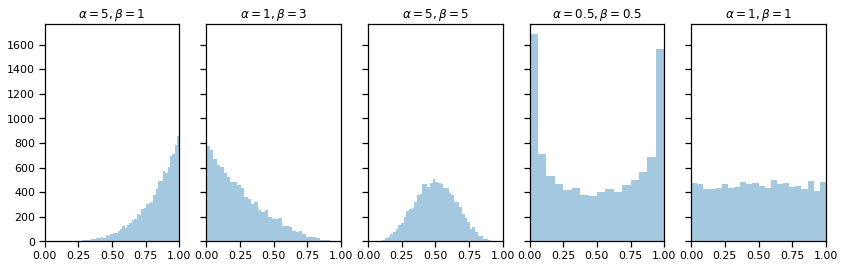

In [33]:
from pymc3 import Beta

params = (5, 1), (1, 3), (5, 5), (0.5, 0.5), (1, 1)

fig, axes = plt.subplots(1, len(params), figsize=(14, 4), sharey=True)
for ax, (alpha, beta) in zip(axes, params):
    sns.distplot(Beta.dist(alpha, beta).random(size=10000), ax=ax, kde=False)
    ax.set_xlim(0, 1)
    ax.set_title(r'$\alpha={0}, \beta={1}$'.format(alpha, beta));

So let's use a beta distribution to model our prior knowledge of the probabilities for both groups. Setting $\alpha = \beta = 1$ will result in a uniform distribution of prior mass:

In [34]:
with Model() as ivh_model:
    
    p = Beta('p', 1, 1, shape=2)

We can now use `p` as the parameter of our Bernoulli likelihood. Here, `x` is a vector of zeros an ones, which will extract the approproate group probability for each subject:

In [35]:
from pymc3 import Bernoulli

with ivh_model:
    
    bb_like = Bernoulli('bb_like', p=p[x], observed=ivh)

Finally, since we are interested in the difference between the probabilities, we will keep track of this difference:

In [36]:
with ivh_model:
    
    p_diff = Deterministic('p_diff', p[1] - p[0])

In [37]:
with ivh_model:
    ivh_trace = sample(1000, init=None)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3708.11draws/s]


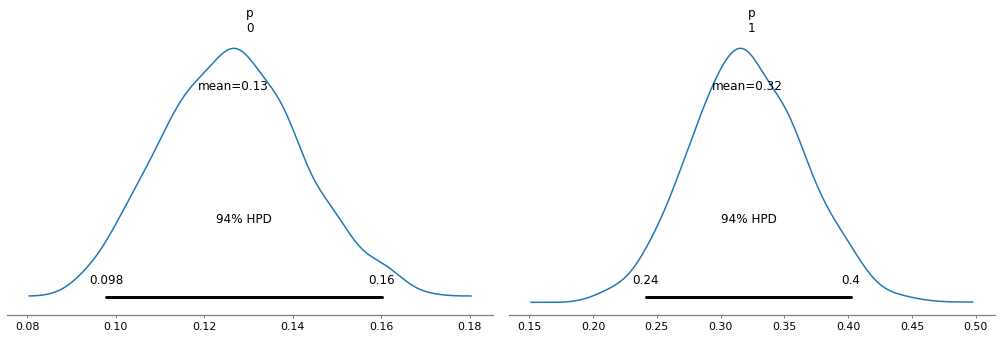

In [38]:
plot_posterior(ivh_trace[100:], var_names=['p']);

We can see that the probability that `p` is larger for the pneumothorax with probability one.

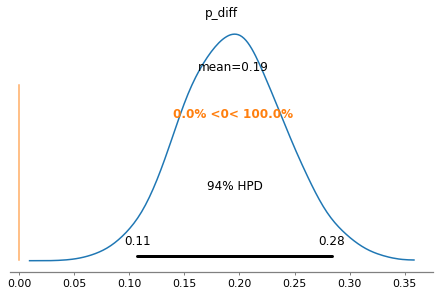

In [39]:
plot_posterior(ivh_trace[100:], var_names=['p_diff'], ref_val=0);

As a final demonstration, let's make this analysis slightly more realistic. Since these are observational data, its probably a bad idea to compare group probabilities without correcting them for **confounding variables**. Individuals may have systematic differences between groups that may explain the difference in observed outcomes that have nothing to do with group membership itself. 

For example, perhaps lower birthweight accounts for the difference, since birthweight is nominally lower in the pneumothorax group:

In [40]:
vlbw.groupby('pneumo').bwt.mean()

pneumo
0.0    1089.395122
1.0    1035.355140
Name: bwt, dtype: float64

Let's add birth weight as a predictor to our model (but first we will standardize it to aid interpretation and for numerical stability):

In [41]:
bwt_norm = (vlbw.bwt - vlbw.bwt.mean()) / vlbw.bwt.std()

How do we add a continuous covariate to this model?

The easiest way to do so is to change the formulation of the model to that of a **generalized linear model (GLM)**. What this does is create a regression model to predict the latent probability of IVH for each individual. 

$$p_i = \mu + \alpha * \text{bwt}_i + \beta * \text{pneumo}_i$$

here, $\mu$ is a baseline probability, $\alpha$ is a coefficient for centered birthweight, and $\beta$ is a coefficient for pneumothorax.

However, this presents a problem as formulated: its very easy to generate combinations of $\mu$, $\alpha$, and $\beta$ that generate values outside the $(0,1)$ interval. To avoid this, we must **transform** this sum in such a way that the unit interval constraint is guaranteed.

One such transformation is the **logit**:

$$x = \text{logit}(p) = \log\left[\frac{p}{1-p}\right]$$

the inverse of this function maps real values of $x$ to values of $p$ on the unit interval:

$$p = \text{invlogit}(x) = \frac{1}{1 + \exp(-x)}$$

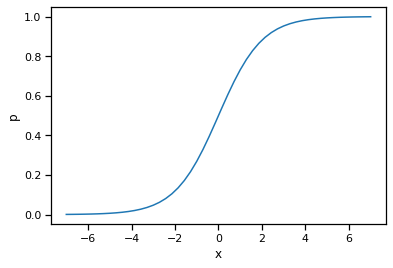

In [42]:
x_range = np.linspace(-7,7)
plt.plot(x_range, 1/(1+np.exp(-x_range)))
plt.xlabel('x')
plt.ylabel('p');

To convert our original model to a GLM, we need to specify priors for the linear model coefficients:

In [43]:
with Model() as ivh_glm:
    
    μ = Normal('μ', 0, sd=5)
    α = Normal('α', 0, sd=5)
    β = Normal('β', 0, sd=5)

Then, apply the `invlogit` transformation to the linear combination of predictors.

The likelihood stays the same.

In [44]:
from pymc3.math import invlogit

with ivh_glm:
        
    p = invlogit(μ + α*bwt_norm + β*x)
    
    bb_like = Bernoulli('bb_like', p=p, observed=ivh)

In [45]:
with ivh_glm:
    trace_glm = sample(1000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [β, α, μ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:03<00:00, 969.92draws/s] 


We can see that the estimate for $\alpha$ is negative, indicating that higher birth weight reduces the baseline probability of IVH. 

The coefficient for $\beta$ is strongly positive.

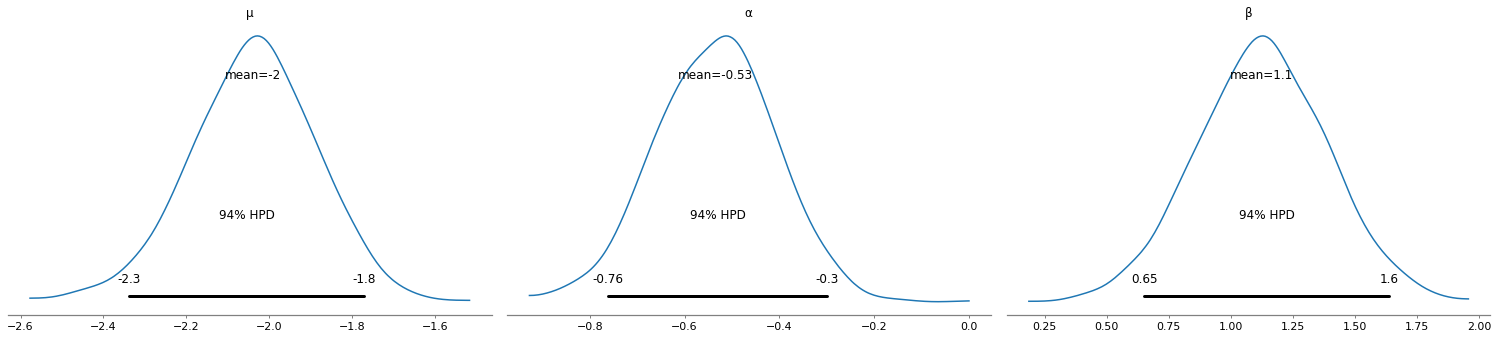

In [46]:
plot_posterior(trace_glm[100:], var_names=['μ', 'α', 'β']);

How might we represent the effect of pneumothorax as a quantity on the probability scale, to aid interpretation?

---

# References

Gelman, Andrew, John B. Carlin, Hal S. Stern, David B. Dunson, Aki Vehtari, and Donald B. Rubin. 2013. Bayesian Data Analysis, Third Edition. CRC Press.

Pilon, Cam-Davidson. [Probabilistic Programming and Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)